<a href="https://colab.research.google.com/github/Showcas/NLP/blob/main/02_2_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with LLMs

## tf-idf

tf-idf stands for *term frequency — inverse document frequency*

---

In [3]:
!pip install pandas

Here, we have 4 documents.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

data_set = (
    "Bali is an island and not a country",
    "Peru is a country in south america",
    "This is a country. That is not a country",
    "japan is a country made of more than one island"
)

vectorizer = CountVectorizer(stop_words='english')

# fit the vectorizer to the data set
vectorizer.fit(data_set)

# print sorted vocabulary dictionary
sorted(vectorizer.vocabulary_.items(), key=lambda k: k[1])

[('america', 0),
 ('bali', 1),
 ('country', 2),
 ('island', 3),
 ('japan', 4),
 ('peru', 5),
 ('south', 6)]

In [44]:
# Converting dataset into spare matrix
smatrix = vectorizer.transform(data_set)

print(smatrix)
print(smatrix.shape)

# Note that the sparse matrix created called smatrix is a scipy sparse matrix with
# elements stored in coordinate format. But you can convert it into a dense format.
print(vectorizer.vocabulary_)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (1, 6)	1
  (2, 2)	2
  (3, 2)	1
  (3, 3)	1
  (3, 4)	1
(4, 7)
{'bali': 1, 'island': 3, 'country': 2, 'peru': 5, 'south': 6, 'america': 0, 'japan': 4}


In [28]:
# here we have a dense representation of the same matrix
smatrix.todense()

matrix([[0, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 1, 1],
        [0, 0, 2, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0]])

Each row in the output matrix corresponds to document in the data_set. Each column corresponds to corresponding words from the vocabulary.

So the first row of the matrix represents the encoding of the first sentence in the data set (`"Bali is an island and not a country"`)
The encoding is as follows:
```
[0, 1, 1, 1, 0, 0, 0]
```

This means that the first sentence in the data set has the following words encoded:
```
[   0,         1,      1,           1,          0,          0,          0       ]
                ⬇      ⬇            ⬇                                         
[   'america', 'bali', 'country',   'island',   'japan',    'peru',     'south' ]
```

"bali", "country", "island" are the words in the first sentence in the data set

Each element of the matrix is ‘term frequency’, i.e. number of times the word appears in that particular document.
For Example: *‘country’* appears 2 times in document 2.

Finally, idf (inverse document frequency):


$$ idf_t = \log \left(\frac{N+1}{df_t+1}\right) + 1$$

**Note**: Without smoothing the $+1$ in the numerator and denumerator would not be included.

$N$: cardinality of our document space. In this example it is `4`.

$df_t$: the number of documents that term t appears in **(adding 1 into the formula to avoid zero-division)**.

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer() #by default norm = "l2"

tfidf.fit(smatrix)

print("IDF:", tfidf.idf_)

IDF: [1.91629073 1.91629073 1.         1.51082562 1.91629073 1.91629073
 1.91629073]


IDF is calculated for each feature (in this case each term t)

The purpose of the IDF is to quantify how unique or important a feature is across a collection of documents (the corpus). It assigns a higher weight to features that are rare in the corpus and a lower weight to features that are common.

- High IDF: The feature is rare, making it useful for distinguishing between documents.
- Low IDF: The feature is common, and thus less useful for differentiation (e.g., stop words like "the" or "and").

idf for term *'island'*:

\begin{align}
N&=4\\
df_t  =  df(\text{island}) & = 2 \qquad \text{Island appears in document 0 \& 3}\\
idf & =  \log\left(\frac{1+4}{1+2}\right)+1\\
& = log\left(\frac{5}{3}\right)+1\\
& = 0.51 + 1\\
& = 1.51
\end{align}

Using the above IDF, tf-idf is calculated by multiplying it with term frequency matrix.

tf-idf calculation of document 0

\begin{align}
\vartheta_{tfidf_{doc0}} & =
\underbrace{
\begin{bmatrix}
 0 & 1 & 1 & 1 & 0 & 0 & 0
\end{bmatrix}
}_{tf_{doc0}}
\times
\underbrace{
\begin{bmatrix}
 1.916 & 1.916 & 1 & 1.51 & 1.916 & 1.916 & 1.916
\end{bmatrix}}_{idf} \\
\vartheta_{tfidf_{doc0}} & = \begin{bmatrix}
 0 & 1.916 & 1 & 1.51 & 0 & 0 & 0
\end{bmatrix}
\end{align}

Final step is to normalize each row of this matrix. This is to overcome a bias towards frequently repeated words in long documents which might make them look more important than they are just because of the high frequency of the term in the document.

Please note: `TfidfTransformer` does the above calculation and L2 normalization (by default) on the `smatrix`.

#### TASK 2.3
Calculate the IDF for the following sentence using the following example sentence:
1. Vectorize the sentence
2. Create a new instance of `TfidfTransformer()` called `tfidf_task`
3. Calculate the tf-idf
4. Print the IDF

In [46]:
# example sentence
example_sentence = ["Japan is not in south america"]

### IMPLEMENT YOUR SOLUTION HERE ###

vectorizer_two = CountVectorizer(stop_words='english')

vectorized_sentence = vectorizer_two.fit_transform(example_sentence)

tfidf_task = TfidfTransformer()

tfidf_task.fit(vectorized_sentence)

# 4. Print the IDF
print("IDF:", tfidf_task.idf_)


IDF: [1. 1. 1.]


### L2 Normalization: Enhancing Feature Comparability

**Introduction to L2 Normalization**:
- L2 normalization, often referred to as Euclidean normalization, is a widely used method in data preprocessing, especially in the context of machine learning and text processing.
- The goal of L2 normalization is to adjust the values in a feature vector so that they conform to a Euclidean norm of 1. This process involves dividing each element in the vector by the Euclidean length (or "L2 norm") of the entire vector.
- This normalization technique is crucial for models that are sensitive to the magnitude of features, as it ensures that each feature vector has the same scale, thereby allowing for fair comparisons and distance calculations between vectors.

**L2 Norm Calculation for a Matrix Row**:
- To illustrate, consider the L2 norm calculation for row 1 of a given matrix. The L2 norm of a vector `v` (representing a row in the matrix) is computed as the square root of the sum of the squared elements in `v`.

    Suppose row 1 of our matrix is represented as:
  $v = \begin{bmatrix} a_1 & a_2 & \cdots & a_n \end{bmatrix}$

    The L2 norm of this row (`||v||_2`) is calculated as:
    $ ||v||_2 = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$

- After computing the L2 norm, each element in the row is divided by this norm. This process effectively scales the vector so that its Euclidean length is 1, while preserving the direction and relative proportions of the original vector.

**Example**: If row 1 of the matrix has values $[3, 4, 0]$, the L2 normalization would involve dividing each element by the Euclidean length of this row, calculated as $\sqrt{3^2 + 4^2 + 0^2} = 5$. Thus, the normalized row would be $\frac{3}{5}, \frac{4}{5}, 0$.

You can see this calculation done on our data below:


\begin{align}
\vec{tfidf_{doc0}} & = \begin{pmatrix}
0 & 1.916 & 1 & 1.51 & 0 & 0 & 0
\end{pmatrix}
\end{align}

\begin{align}
\vartheta_{tfidf}  & = \begin{bmatrix}
 0 & 1.916 & 1 & 1.51 & 0 & 0 & 0
\end{bmatrix} \quad \text{without norm} \\
\text{Apply L2 norm} \\
\vartheta_{norm}  & = \frac{ \begin{bmatrix}
 0 & 1.916 & 1 & 1.51 & 0 & 0 & 0
\end{bmatrix}}{\sqrt{1.916^2+1^2+1.52^2}}
=
\frac{ \begin{bmatrix}
 0 & 1.916 & 1 & 1.51 & 0 & 0 & 0
\end{bmatrix}}{2.63} \\
\vartheta_{norm}  & =
\begin{bmatrix}
 0 & 0.726 & 0.379 & 0.572 & 0 & 0 & 0
\end{bmatrix} \quad \text{for document 0}
\end{align}

After normalization, our final matrix is:

In [47]:
tf_idf_matrix = tfidf.transform(smatrix)
tf_idf_matrix.todense()

matrix([[0.        , 0.72664149, 0.37919167, 0.5728925 , 0.        ,
         0.        , 0.        ],
        [0.55280532, 0.        , 0.28847675, 0.        , 0.        ,
         0.55280532, 0.55280532],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.37919167, 0.5728925 , 0.72664149,
         0.        , 0.        ]])

#### TASK 2.4
Utilize Pandas to display the TF-IDF matrix in a more readable format.
1. Create a dataframe
2. Set the column names to the words in the vocabulary
3. Print the dataframe

In [48]:
import pandas as pd
### IMPLEMENT YOUR SOLUTION HERE ###

tf_idf_df = pd.DataFrame(
    tf_idf_matrix.todense(),
    columns=vectorizer.get_feature_names_out()
)

print(tf_idf_df)

    america      bali   country    island     japan      peru     south
0  0.000000  0.726641  0.379192  0.572892  0.000000  0.000000  0.000000
1  0.552805  0.000000  0.288477  0.000000  0.000000  0.552805  0.552805
2  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
3  0.000000  0.000000  0.379192  0.572892  0.726641  0.000000  0.000000


### Understanding the TF-IDF Matrix

- **Term Importance**: In the TF-IDF matrix, the larger the value, the more important the term is for that specific document. This measure helps in identifying terms that are more relevant in the context of each document.

- **Weight of Common vs Unique Terms**:
  - If a term, let's say `t1`, appears in **all** the documents along with some unique terms in a particular document, `t1` is assigned less weight than the unique terms in that document.
  - For example, consider the first document with the text: `"Bali is an island and not a country"`. In the TF-IDF matrix, we observe the following weights:
    - The term `country` has a lower weight (e.g., 0.379) as it might appear more frequently across multiple documents.
    - The term `bali`, which exists only in this document, is assigned a higher weight (e.g., 0.726) indicating its unique importance in this context.
    - The term `island` has a weight of 0.572, which is between `bali` and `country`, as it also appears in other documents (e.g., document 4).

- **Application in Machine Learning**:
  - The TF-IDF matrix can be effectively utilized as a feature set for machine learning algorithms based on logistic regression, decision trees, or other similar methods. This matrix provides a quantifiable way to represent text data for predictive modeling.


In [49]:
# the entire "pipeline" of vectorizing our data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
vectorized = tfidf.fit_transform(data_set)
vectorized.todense()

matrix([[0.        , 0.72664149, 0.37919167, 0.5728925 , 0.        ,
         0.        , 0.        ],
        [0.55280532, 0.        , 0.28847675, 0.        , 0.        ,
         0.55280532, 0.55280532],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.37919167, 0.5728925 , 0.72664149,
         0.        , 0.        ]])

## Put it to test with the same data as in notebook 2-1

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [51]:
train_set = fetch_20newsgroups(
    categories=('sci.electronics', 'sci.space', 'sci.crypt'),
    remove=('headers', 'footers', 'quotes'),
    subset='train'  # training set
)

tfidf = TfidfVectorizer(
    max_df=0.95,  # only words that appear in maximum of 95% documents
    min_df=3,     # only words that appear in at least 3 documents
)

# Create tfidf matrix from training data
X_train = tfidf.fit_transform(train_set.data)
y_train = train_set.target

In [52]:
# Fit the model
clf = LogisticRegression()
_ = clf.fit(X_train, y_train)

In [53]:
# Load test data
test_set = fetch_20newsgroups(
    categories=('sci.electronics', 'sci.space', 'sci.crypt'),
    remove=('headers', 'footers', 'quotes'),
    subset='test'  # test set
)

# again, .transform, NOT .fit_transform -> See notebook 2-1 for explanation
X_test = tfidf.transform(test_set.data)
y_test = test_set.target

In [54]:
X_train.shape

(1779, 8034)

In [55]:
X_test.shape

(1183, 8034)

In [56]:
# Get predictions
y_pred = clf.predict(X_test)

In [57]:
# And then do all the metrics:
from sklearn import metrics

In [58]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, average='weighted')

print(f"Accuracy : {accuracy:>.4f}")
print(f"Precision: {precision:>.4f}")
print(f"Recall   : {recall:>.4f}")
print(f"F-Score  : {fscore:>.4f}")

Accuracy : 0.8183
Precision: 0.8246
Recall   : 0.8183
F-Score  : 0.8190


In [59]:
print(metrics.classification_report(y_test, y_pred, target_names=test_set.target_names))

                 precision    recall  f1-score   support

      sci.crypt       0.88      0.77      0.82       396
sci.electronics       0.74      0.85      0.79       393
      sci.space       0.85      0.84      0.85       394

       accuracy                           0.82      1183
      macro avg       0.82      0.82      0.82      1183
   weighted avg       0.82      0.82      0.82      1183



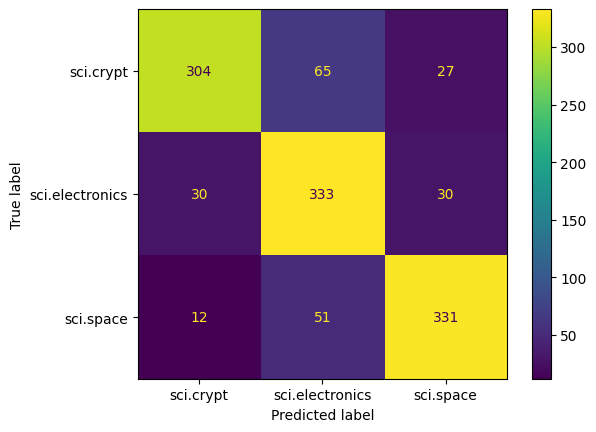

In [60]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=test_set.target_names)

## What happened?

$$
y = A x + b
$$

$A$ are the coefficicents, $b$ is the intercept.

Normalization will later give probabilities.

In [61]:
clf.coef_

array([[-2.23537458e-01, -9.98324602e-02,  5.05356642e-02, ...,
        -1.04270833e-01, -1.00084994e-01, -2.34627905e-02],
       [ 1.86882312e-01, -2.62279200e-01, -5.07797255e-02, ...,
         1.22317614e-01, -1.51455332e-01, -2.38072577e-02],
       [ 3.66551456e-02,  3.62111660e-01,  2.44061286e-04, ...,
        -1.80467817e-02,  2.51540325e-01,  4.72700482e-02]])

In [62]:
clf.intercept_

array([-0.40448571,  0.23838187,  0.16610384])

In [64]:
clf.predict(X_test[:1])

array([1])

In [65]:
print(X_test[:1].todense())

[[0. 0. 0. ... 0. 0. 0.]]


In [66]:
clf.predict_proba(X_test[:1])

array([[0.21407606, 0.40715705, 0.37876689]])

In [67]:
clf.decision_function(X_test[:1])

array([[-0.40448571,  0.23838187,  0.16610384]])

In [68]:
# Multiply input with coefficients and add intercept
scores = (
    X_test[0].todense()
    .dot(
        clf.coef_.T
    )
    + clf.intercept_
)

print(scores)

[[-0.40448571  0.23838187  0.16610384]]
